In [3]:
### Installing the basic libraryes

In [4]:
%pylab inline
import re
import math
import string
from collections import Counter
import requests

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
### We ll take the database with words from Piter Novik - google director of researches

In [5]:
TEXT = requests.get('https://norvig.com/big.txt').text

In [6]:
# devide the text into the separate words by regular (re) func
def tokens(text):
    return re.findall(r'[a-z]+', text.lower()) 

In [9]:
# each step should be checked
tokens('This is a test input')

['this', 'is', 'a', 'test', 'input']

In [12]:
#The lenght of out database
WORDS = tokens(TEXT)
len(WORDS)

1105285

### 2 - Bag of Words

In [13]:
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [14]:
COUNTS = Counter(WORDS)

### 3 - Spell Cheker

In [17]:
# c = correct(w)  - for each word w
# 2 types - word is simmilar to out database(check and correct) & word is unknowm and we are taking the most popular simmilar to

In [18]:
def correct(word):
    "Serch of best check for word."
    #  edit_distance==0, then 1, then 2; or leave the word".
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

In [19]:
def known(words):
    "Return the subset of words in database."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "return the word edit_distant=0."
    return {word}

def edits2(word):
    "Edit_distand = 2"
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [20]:
def edits1(word):
    "Edit_distant = 1."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Splitting the word to subset a b(a+b = word)."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

##### tests

In [25]:
splits('home')

[('', 'home'), ('h', 'ome'), ('ho', 'me'), ('hom', 'e'), ('home', '')]

In [26]:
edits0('home')

{'home'}

In [30]:
print(edits1('home'))

{'homeo', 'homh', 'zhome', 'homve', 'homv', 'homx', 'chome', 'huome', 'homoe', 'homwe', 'phome', 'rome', 'hoke', 'hoxe', 'homz', 'homl', 'some', 'homev', 'homei', 'hofe', 'hoye', 'homje', 'homo', 'hole', 'hlome', 'vhome', 'vome', 'homej', 'homq', 'hoxme', 'homye', 'hyme', 'hozme', 'homb', 'hgme', 'hokme', 'hobme', 'home', 'hume', 'hofme', 'howme', 'hosme', 'homae', 'homc', 'hwome', 'homel', 'homu', 'hhme', 'dome', 'hojme', 'hgome', 'homse', 'lome', 'yome', 'homp', 'lhome', 'hzome', 'homfe', 'ahome', 'hcome', 'nome', 'hyome', 'hohe', 'homeh', 'mhome', 'hpme', 'hope', 'hogme', 'homes', 'hoze', 'homeq', 'fome', 'hsome', 'hzme', 'hoce', 'hame', 'khome', 'xhome', 'homeb', 'hopme', 'hone', 'oome', 'hove', 'hoae', 'homed', 'homf', 'hoome', 'hxome', 'thome', 'hovme', 'hme', 'rhome', 'hqome', 'homeu', 'aome', 'bhome', 'homxe', 'homey', 'hoge', 'homk', 'homi', 'homie', 'hbme', 'ihome', 'kome', 'hjme', 'hrome', 'hmome', 'hotme', 'ohme', 'hmme', 'hoyme', 'homue', 'homep', 'hqme', 'ome', 'hdome', '

In [31]:
print(len(edits2('home')))

24254


In [33]:
test = tokens("Whatver tet si, ir wuo;d eb corected")

['whatver', 'tet', 'si', 'ir', 'wuo', 'd', 'eb', 'corected']

In [40]:
list(map(correct, tokens("Whatver text is in< it wold eb corected")))

['whatever', 'text', 'is', 'in', 'it', 'would', 'be', 'corrected']

##### func to save the register

In [41]:
def correct_text(text):    
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Register"
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Func register returns"
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [43]:
correct_text("Nothing IS foreveR")

'Nothing IS forever'

In [44]:
correct_text("NothisgISforever")

'nothisgisforever'

In [45]:
#lets add the func to corret the splits of the words

In [46]:
def memo(f):
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo

In [48]:
def splits(text, start=0, L=20):
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

In [49]:
@memo
def segment(text):

    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)

In [61]:
def pdist(counter):
    N = sum(list(counter.values()))
    return lambda x: counter[x]/N

P = pdist(COUNTS)

def Pwords(words):
    "Probability of the words"
    return product(P(w) for w in words)

def product(nums):
    "Перемножим числа.  (Это как `sum`, только с умножением.)"
    result = 1
    for x in nums:
        result *= x
    return result

##### Test

In [62]:
decl = 'NothingISforever'
print(segment(decl))

['N', 'o', 't', 'h', 'i', 'n', 'g', 'I', 'S', 'forever']


In [64]:
##### Lets make the database more widther

In [65]:
def load_counts(text, sep='\t'):
    C = Counter()
    for i in [l.split('\t') for l in text.split('\n')][:-1]:
        key, count = i
        C[key] = int(count)
    return C

In [66]:
COUNTS1 = load_counts(requests.get('https://www.norvig.com/ngrams/count_1w.txt').text)
COUNTS2 = load_counts(requests.get('https://www.norvig.com/ngrams/count_2w.txt').text)
print(len(COUNTS1), sum(list(COUNTS1.values()))/1e9)
print(len(COUNTS2), sum(list(COUNTS2.values()))/1e9)

333333 588.124220187
286358 225.955251755


# Validation

In [67]:
def test_segmenter(segmenter, tests):
    ""
    return sum([test_one_segment(segmenter, test) 
               for test in tests]), len(tests)

def test_one_segment(segmenter, test):
    words = tokens(test)
    result = segmenter(''.join(words))
    correct = (result == words)
    if not correct:
        print('expected', words)
        print('got     ', result) 
    return correct

proverbs = ("""A little knowledge is a dangerous thing
  A man who is his own lawyer has a fool for his client
  All work and no play makes Jack a dull boy
  Better to remain silent and be thought a fool that to speak and remove all doubt;
  Do unto others as you would have them do to you
  Early to bed and early to rise, makes a man healthy, wealthy and wise
  Fools rush in where angels fear to tread
  Genius is one percent inspiration, ninety-nine percent perspiration
  If you lie down with dogs, you will get up with fleas
  Lightning never strikes twice in the same place
  Power corrupts; absolute power corrupts absolutely
  Here today, gone tomorrow
  See no evil, hear no evil, speak no evil
  Sticks and stones may break my bones, but words will never hurt me
  Take care of the pence and the pounds will take care of themselves
  Take care of the sense and the sounds will take care of themselves
  The bigger they are, the harder they fall
  The grass is always greener on the other side of the fence
  The more things change, the more they stay the same
  Those who do not learn from history are doomed to repeat it"""
  .splitlines())

In [70]:
test_segmenter(segment, proverbs)

expected ['power', 'corrupts', 'absolute', 'power', 'corrupts', 'absolutely']
got      ['power', 'corrupt', 's', 'absolute', 'power', 'corrupt', 's', 'absolutely']
expected ['the', 'grass', 'is', 'always', 'greener', 'on', 'the', 'other', 'side', 'of', 'the', 'fence']
got      ['the', 'grass', 'is', 'always', 'green', 'er', 'on', 'the', 'other', 'side', 'of', 'the', 'fence']


(18, 20)

In [71]:
segment('thisisatestofsegmentationofalongsequenceofwords')

['this',
 'is',
 'a',
 'test',
 'of',
 'segment',
 'at',
 'i',
 'on',
 'of',
 'along',
 'sequence',
 'of',
 'words']

(array([  51.,  159.,  368.,  747., 1113., 1357., 1356., 1175.,  938.,
         627.,  398.,  215.,  112.,   37.,   10.,    7.]),
 array([ 2.    ,  2.9375,  3.875 ,  4.8125,  5.75  ,  6.6875,  7.625 ,
         8.5625,  9.5   , 10.4375, 11.375 , 12.3125, 13.25  , 14.1875,
        15.125 , 16.0625, 17.    ]),
 <BarContainer object of 16 artists>)

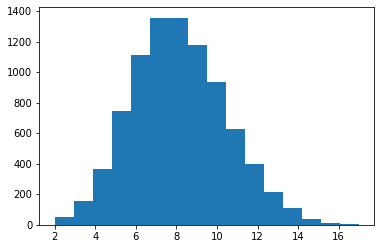

In [76]:
#Just a vizualisation of most common words of each lenghth
singletons = (w for w in COUNTS if COUNTS[w] == 1)
lengths = list(map(len, singletons))
Counter(lengths).most_common()
hist(lengths, bins=len(set(lengths)))